In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Import Data

In [ ]:
col_names = ['phone', 'Laptop', 'TV', 'Headaches', 'Blurry vision', 'Specs']
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/AI Data/Ageremoved_dataset.csv")
pima.head()

,phone,Laptop,TV,Headaches,Blurry vision,Specs
0,6,4,1,0,0,0
1,9,5,1,1,1,1
2,6,3,1,0,0,0
3,10,2,0,1,1,1
4,10,0,4,0,0,1


# Data Split

In [ ]:
#split dataset in features and target variable
feature_cols = ['phone', 'Laptop', 'TV', 'Headaches', 'Blurry vision']
X = pima[feature_cols] # Features
y = pima.Specs # Target variable

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Decision Tree Classifier Tree

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


# Prediction Using Decision Tree

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9942528735632183


In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm  

array([[30,  8],
       [ 7, 30]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7733333333333333


# Model Visualization

Gini prediction for training

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9367816091954023


Gini prediction for testing

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


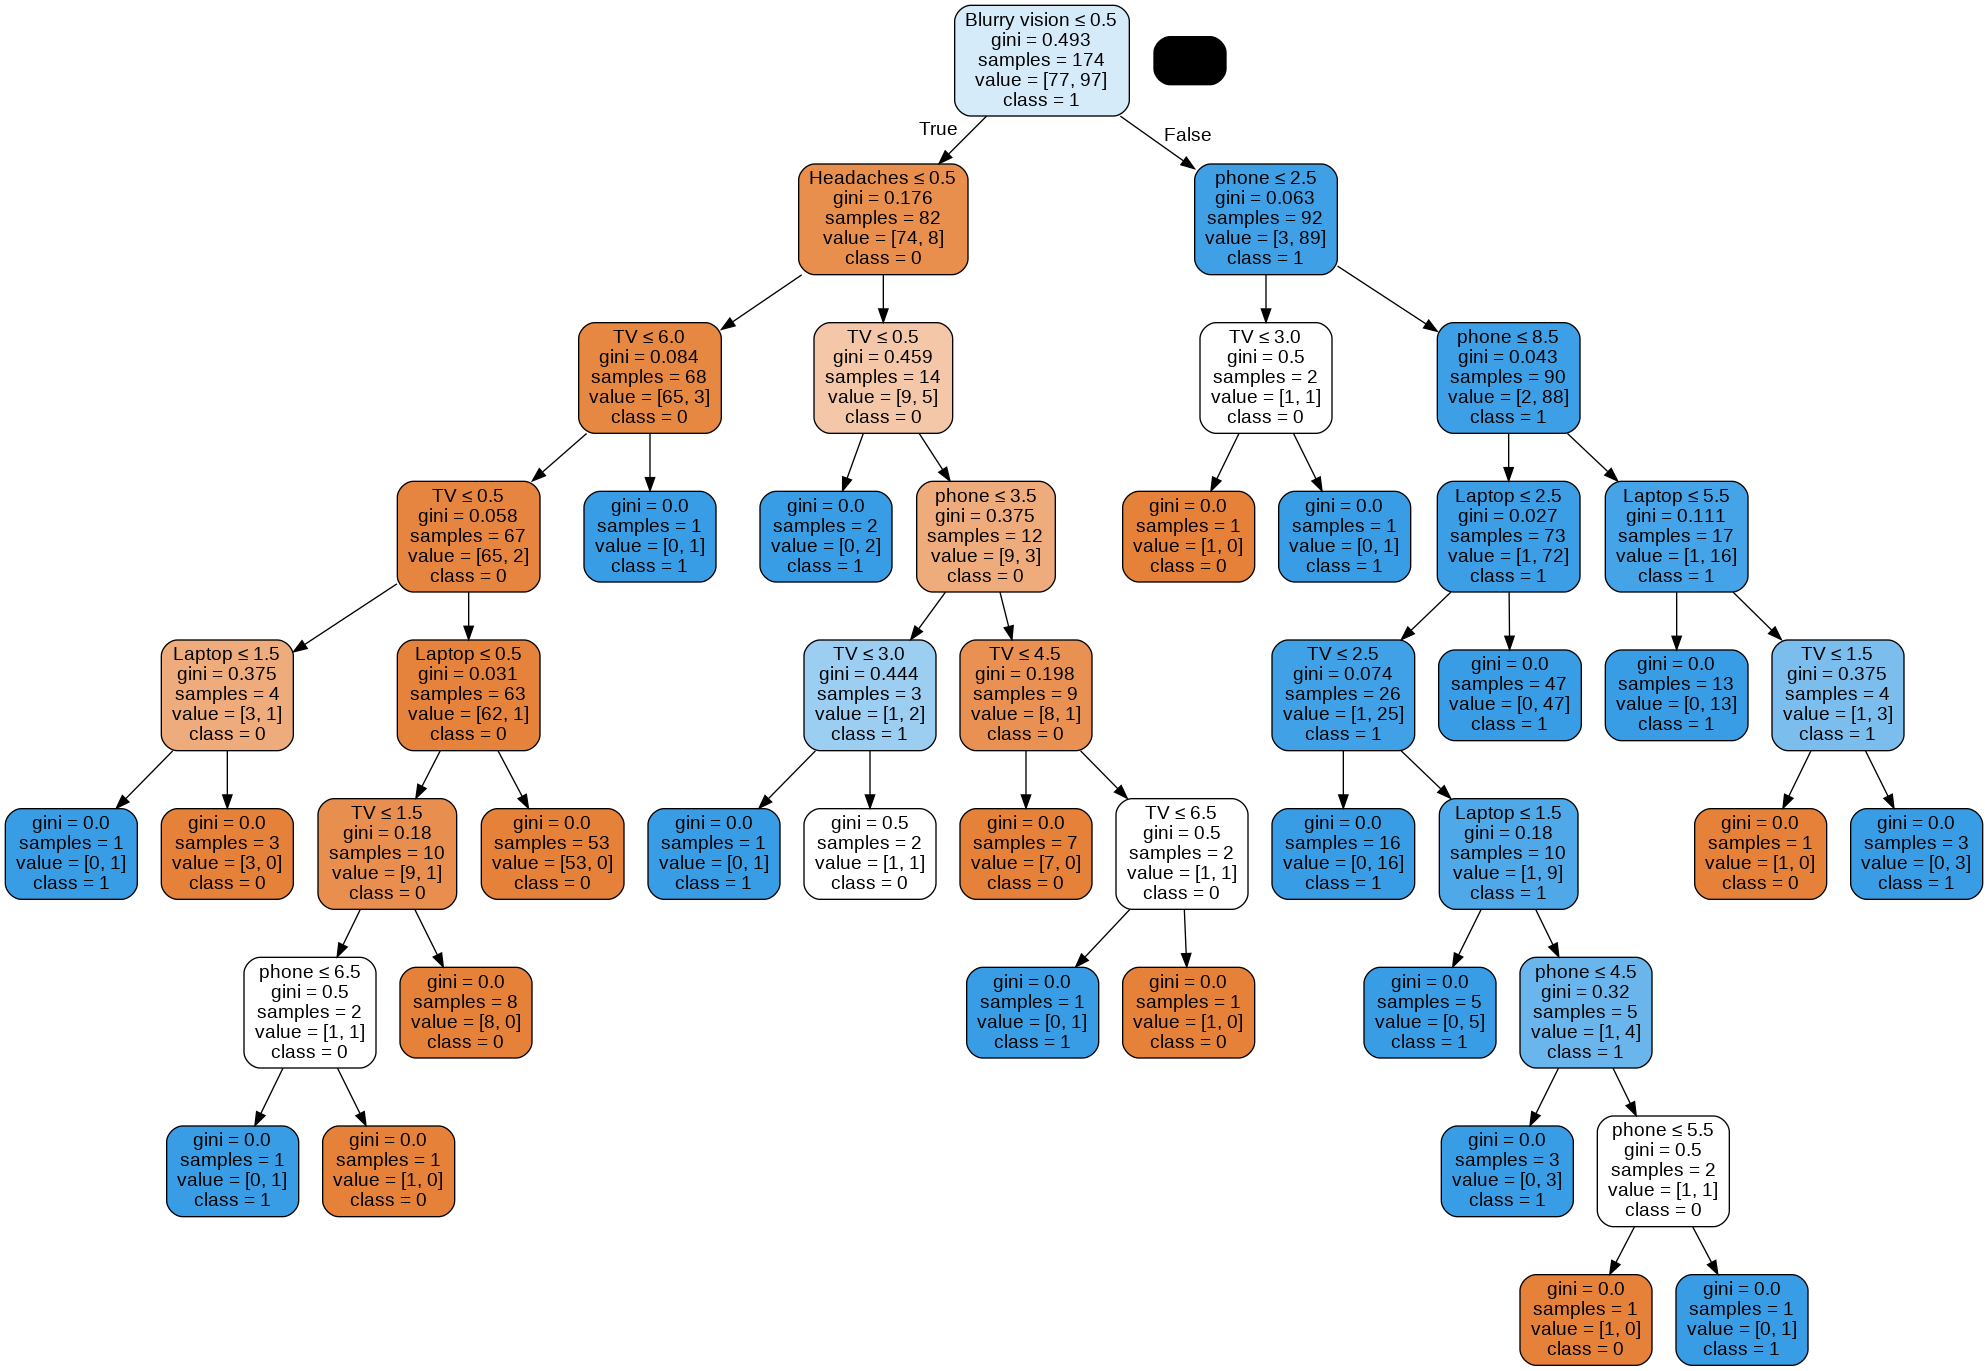

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('spectacles.png')
Image(graph.create_png())

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

# Decision Tree Optimization

Training data

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9655172413793104


Testing data


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8533333333333334


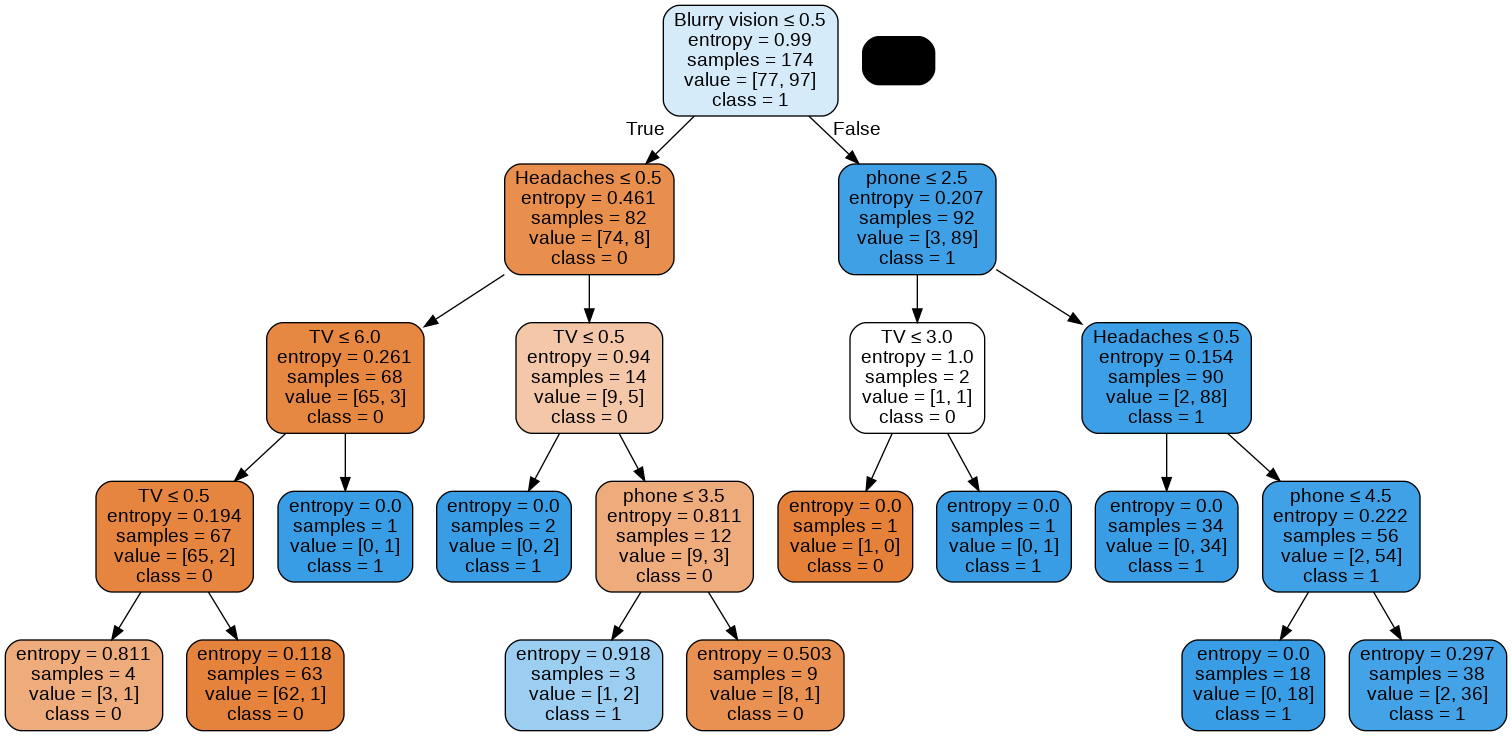

In [ ]:
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('spectacles_Entropy.png')
Image(graph.create_png())

#Save Model

In [ ]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(clf, open(filename, 'wb'))

# Deployment

In [ ]:
list_of_columns = ['phone', 'Laptop', 'TV', 'Headaches', 'Blurry vision']
input_data=pd.DataFrame(columns=list_of_columns)

input_data.at[0, 'phone'] = int(input('Enter hours spent on Phone'))
input_data.at[0, 'Laptop'] = int(input('Enter hours spent on Laptop'))
input_data.at[0, 'TV'] = int(input('Enter hours spent on TV'))
input_data.at[0, 'Headaches'] = int(input('Headache(1/0)'))
input_data.at[0, 'Blurry vision'] = int(input('Blurry vision(1/0)'))



model = pickle.load(open('model.pkl', 'rb'))
prediction = model.predict(input_data)
result = prediction[0]
if(result==1):
  print('You need spectacles')
else:
  print('You do not need spectacles')

Enter hours spent on Phone2
Enter hours spent on Laptop1
Enter hours spent on TV1
Headache(1/0)1
Blurry vision(1/0)0
You need spectacles


#Thank You